# Flipkart Data Analysis

In [7]:
import pandas as pd
import numpy as np
import ast 
import plotly.express as px
from plotly import graph_objects as go
import matplotlib.pyplot as plt


In [8]:
df = pd.read_csv("flipkart_com-ecommerce_sample.csv")

In [9]:
df.head(5)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."


In [10]:
df.isnull().sum()

uniq_id                       0
crawl_timestamp               0
product_url                   0
product_name                  0
product_category_tree         0
pid                           0
retail_price                 78
discounted_price             78
image                         3
is_FK_Advantage_product       0
description                   2
product_rating                0
overall_rating                0
brand                      5864
product_specifications       14
dtype: int64

In [11]:
df.isnull().sum()

uniq_id                       0
crawl_timestamp               0
product_url                   0
product_name                  0
product_category_tree         0
pid                           0
retail_price                 78
discounted_price             78
image                         3
is_FK_Advantage_product       0
description                   2
product_rating                0
overall_rating                0
brand                      5864
product_specifications       14
dtype: int64

In [12]:
x = df['retail_price']-df['discounted_price']
y = (x/df['retail_price']*100)
df['discounted_percentage'] = y

In [13]:
df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,discounted_percentage
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...",62.062062
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati...",29.576764
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""...",50.050050
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...",61.802575
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",...",4.545455


In [14]:
# Split the 'crawl_timestamp' column into 'date' and 'time' columns
df['crawl_timestamp'] = pd.to_datetime(df['crawl_timestamp'], format='%Y-%m-%d %H:%M:%S +0000')
df['date'] = df['crawl_timestamp'].dt.date
df['time'] = df['crawl_timestamp'].dt.time

# Drop the original 'crawl_timestamp' column
df.drop(columns=['crawl_timestamp'], inplace=True)

In [15]:
df.head(5)

,uniq_id,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,discounted_percentage,date,time
0,c2d766ca982eca8304150849735ffef9,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...",62.062062,2016-03-25,22:59:23
1,7f7036a6d550aaa89d34c77bd39a5e48,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati...",29.576764,2016-03-25,22:59:23
2,f449ec65dcbc041b6ae5e6a32717d01b,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""...",50.050050,2016-03-25,22:59:23
3,0973b37acd0c664e3de26e97e5571454,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...",61.802575,2016-03-25,22:59:23
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",...",4.545455,2016-03-25,22:59:23


In [16]:
df.columns

Index(['uniq_id', 'product_url', 'product_name', 'product_category_tree',
       'pid', 'retail_price', 'discounted_price', 'image',
       'is_FK_Advantage_product', 'description', 'product_rating',
       'overall_rating', 'brand', 'product_specifications',
       'discounted_percentage', 'date', 'time'],
      dtype='object')

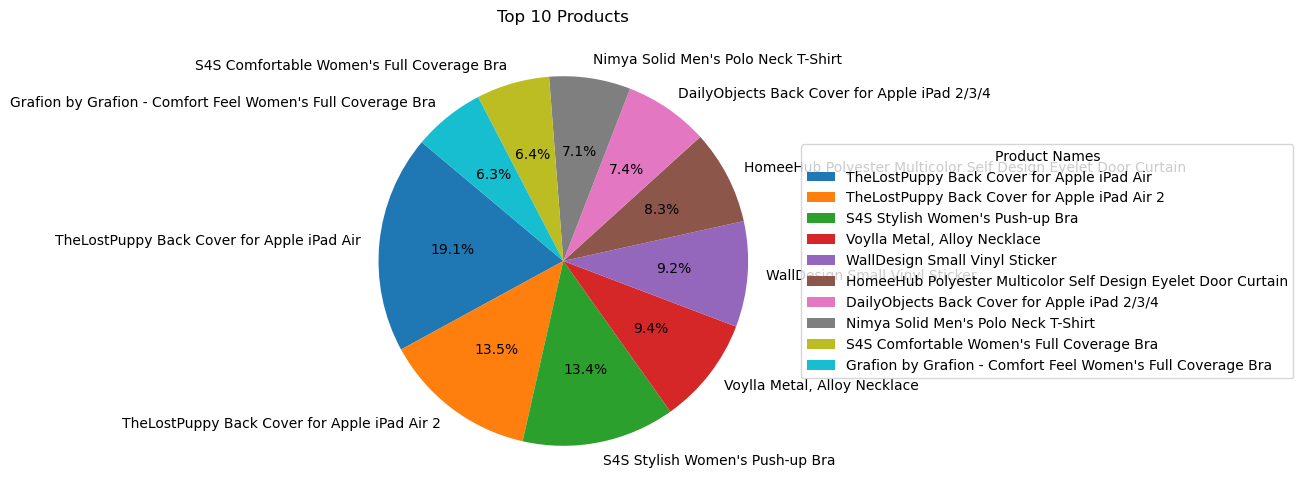

In [17]:
# Count the occurrences of each product
top_products = df['product_name'].value_counts().head(10)

# Count the occurrences of each brand
top_brands = df['brand'].value_counts().head(10)

# Create a pie chart for top products
labels = df.index
plt.figure(figsize=(12, 6))
plt.pie(top_products, labels=top_products.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Products')

# Add legends on the side
plt.legend(top_products.index, loc='center left', bbox_to_anchor=(1, 0.5), title='Product Names', title_fontsize='medium')


# Display the pie charts
plt.show()

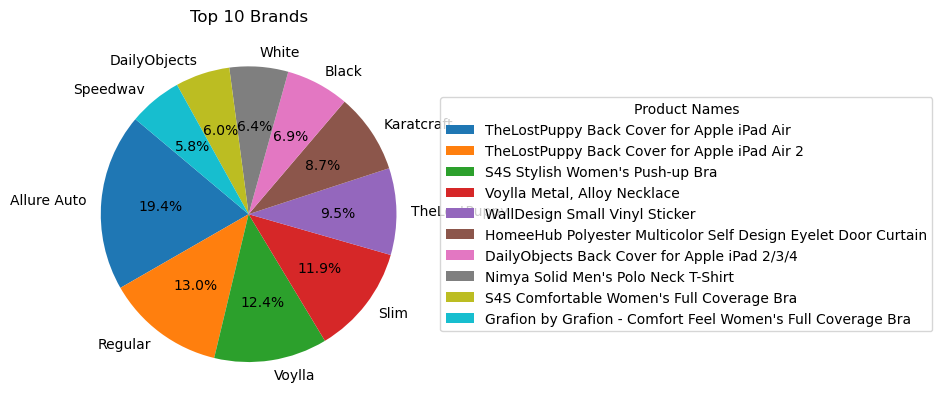

In [18]:
# Create a pie chart for top brands
plt.pie(top_brands, labels=top_brands.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Brands')
# Add legends on the side
plt.legend(top_products.index, loc='center left', bbox_to_anchor=(1, 0.5), title='Product Names', title_fontsize='medium')
# Display the pie charts
plt.show()

In [19]:
df.isnull().sum()

uniq_id                       0
product_url                   0
product_name                  0
product_category_tree         0
pid                           0
retail_price                 78
discounted_price             78
image                         3
is_FK_Advantage_product       0
description                   2
product_rating                0
overall_rating                0
brand                      5864
product_specifications       14
discounted_percentage        78
date                          0
time                          0
dtype: int64

In [60]:
df['brand'].fillna(df['brand'].mode()[0], inplace=True)

In [61]:
df.isnull().sum()

uniq_id                     0
product_url                 0
product_name                0
product_category_tree       0
pid                         0
retail_price                0
discounted_price            0
image                       3
is_FK_Advantage_product     0
description                 2
product_rating              0
overall_rating              0
brand                       0
product_specifications     14
discounted_percentage       0
date                        0
time                        0
dtype: int64

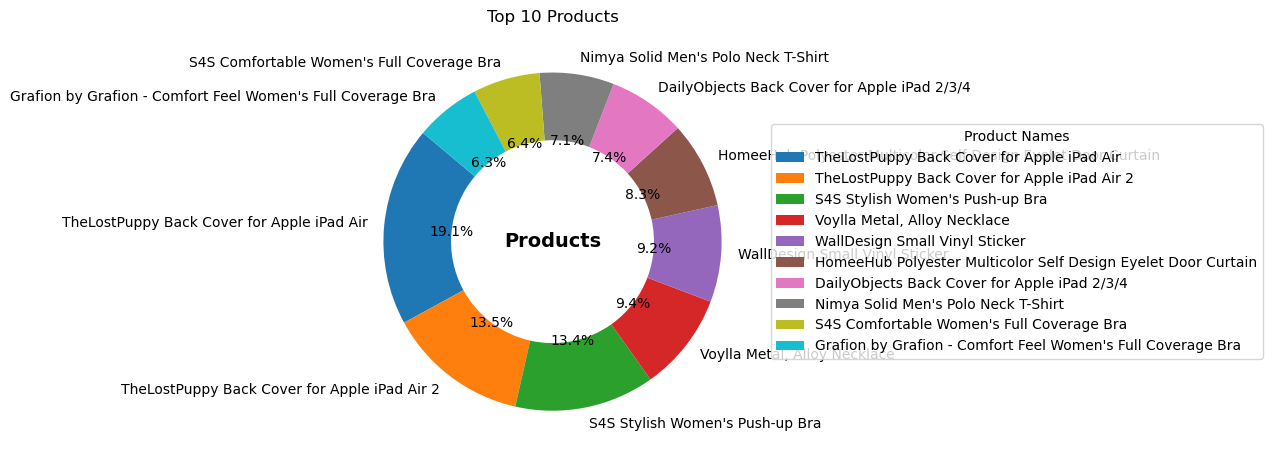

In [77]:
# Count the occurrences of each product
top_products = df['product_name'].value_counts().head(10)

# Create a pie chart for top products with a hole
plt.figure(figsize=(12, 6))
ax1 = plt.subplot(1, 2, 1)
ax1.pie(top_products, labels=top_products.index, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.4))
ax1.set_title('Top 10 Products')

# Add legends on the side
ax1.legend(top_products.index, loc='center left', bbox_to_anchor=(1, 0.5), title='Product Names', title_fontsize='medium')

# Add column names in the center
center_circle = plt.Circle((0, 0), 0.3, color='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

# Add labels in the center
plt.text(0, 0, 'Products', ha='center', va='center', fontsize=14, weight='bold')



# Display the pie charts
plt.show()

Text(0, -0.15, 'Brands')

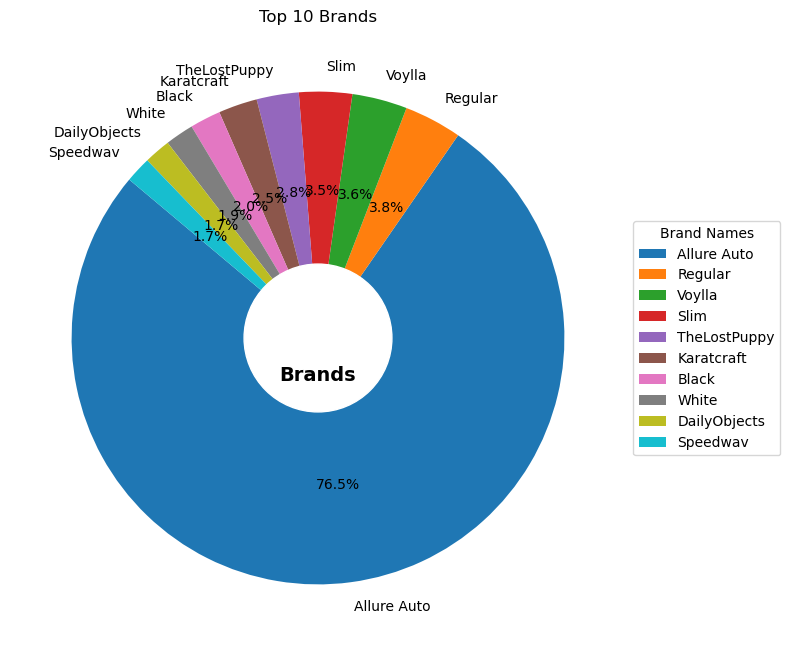

In [88]:
# Count the occurrences of each brand
top_brands = df['brand'].value_counts().head(10) 

# Create a pie chart for top brands with a hole
plt.figure(figsize=(18, 8))
ax2 = plt.subplot(1, 2, 2)
ax2.pie(top_brands, labels=top_brands.index, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.8))
ax2.set_title('Top 10 Brands')

# Add legends on the side
ax2.legend(top_brands.index, loc='center left', bbox_to_anchor=(1, 0.5), title='Brand Names', title_fontsize='medium')


# Add column names in the center
center_circle = plt.Circle((0, 0), 0.3, color='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

# Add labels in the center
plt.text(0, -0.15, 'Brands', ha='center', va='center', fontsize=14, weight='bold')

In [1]:
!pip install pandas-profiling

     -------------------------------------- 324.4/324.4 kB 3.4 MB/s eta 0:00:00
     -------------------------------------- 357.3/357.3 kB 7.4 MB/s eta 0:00:00
     -------------------------------------- 102.7/102.7 kB 5.8 MB/s eta 0:00:00
     -------------------------------------- 152.1/152.1 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 2.1/2.1 MB 7.1 MB/s eta 0:00:00
     -------------------------------------- 296.5/296.5 kB 6.1 MB/s eta 0:00:00
     ------------------------------------- 663.4/663.4 kB 10.5 MB/s eta 0:00:00
     ---------------------------------------- 4.7/4.7 MB 9.1 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27092 sha256=00e693c28440181c6423ee3443d0b64fb0b9a2143f04c23556aa5b390c6a75e8
  Stored in directory: c:\users\swapna\appdata\local\pip\cache\wheels\ea\1c\a8\5cec3479cd45136a7111e2d96aac29

In [2]:
from pandas_profiling import ProfileReport

C:\Users\Swapna\AppData\Local\Temp\ipykernel_22804\2274191625.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [20]:
prof = ProfileReport(df)
prof.to_file(output_file='Report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]